<a href="https://colab.research.google.com/github/motahare-vatandoust/learn-artificial-intelligence/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [13]:
dataSet = pd.read_csv('capacitor_test.csv')

In [14]:
print(dataSet.head())

   Capacitance     ESR  HighQuality
0        14.59  0.0274          1.0
1        15.98  0.0797          1.0
2        15.12  0.0879          1.0
3        17.41  0.0228          1.0
4        12.94  0.0165          1.0


High Quality Count: 100.0
Low Quality Count: 22.0


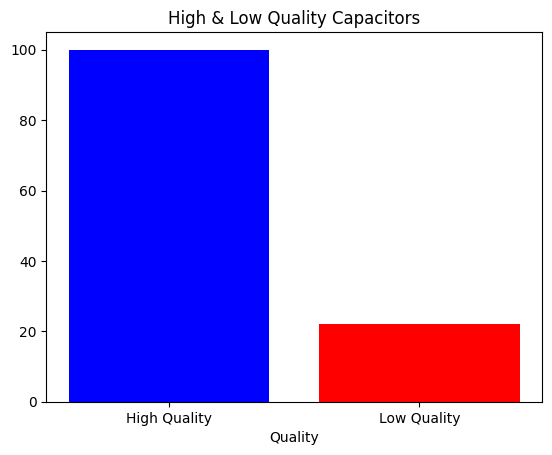

In [17]:
high_quality_count = dataSet['HighQuality'].sum()
low_quality_count = len(dataSet) - high_quality_count
print(f"High Quality Count: {high_quality_count}")
print(f"Low Quality Count: {low_quality_count}")

labels = ['High Quality', 'Low Quality']
values = [high_quality_count, low_quality_count]

plt.bar(labels, values, color=['blue', 'red'])
plt.xlabel('Quality')
plt.title('High & Low Quality Capacitors')
plt.show()

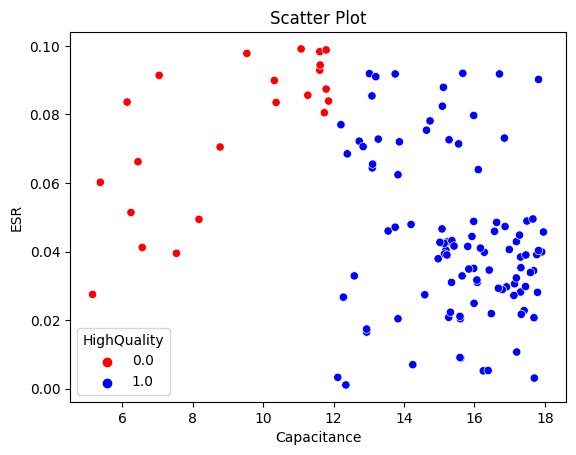

In [20]:
sns.scatterplot(x='Capacitance', y='ESR', hue='HighQuality', data=dataSet, palette={0: 'red', 1: 'blue'})
plt.xlabel('Capacitance')
plt.ylabel('ESR')
plt.title('Scatter Plot')
plt.show()

Decision Boundary: y = 18.6918x + -223.8420


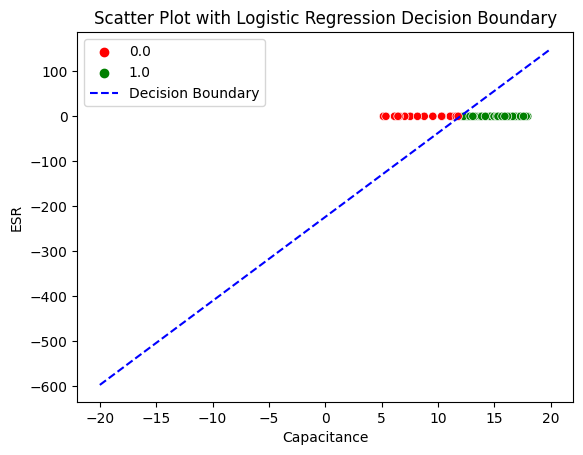

In [35]:
X = dataSet[['Capacitance', 'ESR']]
y = dataSet['HighQuality']
model = LogisticRegression()
model.fit(X, y)
coef = model.coef_[0]
# with help of gpt (start)
intercept = model.intercept_
slope = float(-coef[0] / coef[1])
y_intercept = float(-intercept / coef[1])
# with help of gpt (end)
formula = f"Decision Boundary: y = {slope:.4f}x + {y_intercept:.4f}"
print(formula)

sns.scatterplot(x='Capacitance', y='ESR', hue='HighQuality', data=dataSet, palette={0: 'red', 1: 'green'})
x_decision_boundary = [-20, 20]
y_decision_boundary = [slope * x + y_intercept for x in x_decision_boundary]
plt.plot(x_decision_boundary, y_decision_boundary, linestyle='--', color='blue', label='Decision Boundary')

plt.xlabel('Capacitance')
plt.ylabel('ESR')
plt.title('Scatter Plot with Logistic Regression Decision Boundary')
plt.legend()
plt.show()